# Pracownia P1 Analiza Numeryczna (M)

# Zadanie 12

Mikołaj Korobczak
10.11.2019

In [18]:
using Printf
using PyPlot

function kepler(x, M, e)
    return x - e*sin(x) - M
end

function kepler_derivative(x, M, e)
    return 1 - e * cos(x)
end

function coordinates(a, e, alpha) #not used
    x = a * (cos(alpha) - e)
    y = a * sqrt(1 - e^2) * sin(alpha)
    return x, y
end

function deg2rad(d)
    return d * pi / 180
end

deg2rad (generic function with 1 method)

In [2]:
function bisec(M, e, iter)
    a, b = M - abs(e), M + abs(e)
    m = (a + b) / 2
    for i in 1:iter
        if kepler(a, M, e) * kepler(m, M, e) < 0
            b = m
        else
            a = m
        end
        m = (a + b) / 2
    end
    return m
end

function iteration(M, e, iter)
    x = 0.0
    for i in 1:iter
        x = e * sin(x) + M
    end
    return x
end

function newton(M, e, iter)
    x = M + (e / 2)
    for i in 1:iter
        x -= kepler(x, M, e) / kepler_derivative(x, M, e)
    end
    return x
end

newton (generic function with 1 method)

In [3]:
function bisec_search(M, e, show=false)
    i = 1
    E_bisec_prev = bisec(M, e, 0)
    E_bisec_next = bisec(M, e, 1)
    rel_error_table = [E_bisec_next]
    while abs(E_bisec_prev - E_bisec_next) > 10^-15
        i += 1
        E_bisec_prev = E_bisec_next
        E_bisec_next = bisec(M, e, i)
        push!(rel_error_table, E_bisec_next)
    end
    for j in 1:length(rel_error_table)
        rel_error = abs(rel_error_table[j] - E_bisec_next) / abs(E_bisec_next)
        if show
            @printf("iter: %d \tE: %.16f\trelative error: %.16f\n", j, rel_error_table[j], rel_error)
        end
        rel_error_table[j] = -log(rel_error)
    end
    return E_bisec_next, rel_error_table
end

function iteration_search(M, e, show=false)
    i = 1
    E_iter_prev = iteration(M, e, 0)
    E_iter_next = iteration(M, e, 1)
    rel_error_table = [E_iter_next]
    while abs(E_iter_prev - E_iter_next) > 10^-15 && i < 200
        i += 1
        E_iter_prev = E_iter_next
        E_iter_next = iteration(M, e, i)
        push!(rel_error_table, E_iter_next)
    end
    for j in 1:length(rel_error_table)
        rel_error = abs(rel_error_table[j] - E_iter_next) / abs(E_iter_next)
        if show
            @printf("iter: %d \tE: %.16f\trelative error: %.16f\n", j, rel_error_table[j], rel_error)
        end
        rel_error_table[j] = -log(rel_error)
    end
    return E_iter_next, rel_error_table
end

function newton_search(M, e, show=false)
    i = 1
    E_newton_prev = newton(M, e, 0)
    E_newton_next = newton(M, e, 1)
    rel_error_table = [E_newton_next]
    while abs(E_newton_prev - E_newton_next) > 10^(-15)
        i += 1
        E_newton_prev = E_newton_next
        E_newton_next = newton(M, e, i)
        push!(rel_error_table, E_newton_next)
    end
    for j in 1:length(rel_error_table)
        rel_error = abs(rel_error_table[j] - E_newton_next) / abs(E_newton_next)
        if show
            @printf("iter: %d \tE: %.16f\trelative error: %.16f\n", j, rel_error_table[j], rel_error)
        end
        rel_error_table[j] = -log(rel_error)
    end
    return E_newton_next, rel_error_table
end

newton_search (generic function with 2 methods)

# Przykład działania metod dla Marsa

In [4]:
#for mars 2019-01-01
mars_a = 1.523735308990487
mars_e = 9.337659277899077*10^-2
mars_M = deg2rad(5.576887337043543*10^1)

E_bisec = bisec(mars_M, mars_e, 10^2)
E_iter = iteration(mars_M, mars_e, 10^2)
E_newton = newton(mars_M, mars_e, 10^2)

@printf("%.64f\n%.64f\n%.64f", E_bisec, E_iter, E_newton)

1.0545584351670957978797105170087888836860656738281250000000000000
1.0545584351670957978797105170087888836860656738281250000000000000
1.0545584351670957978797105170087888836860656738281250000000000000

Wszystkie te wyniki dla dużych iteracji osiągają ten wynik więc będziemy go traktować jako prawidłowy



Badanie zbieżności bisekcji:

In [5]:
E, rel_error_bisec_mars = bisec_search(mars_M, mars_e, true)

iter: 1 	E: 1.0200387568313807	relative error: 0.0327337748052303
iter: 2 	E: 1.0433829050261285	relative error: 0.0105973550334337
iter: 3 	E: 1.0550549791235024	relative error: 0.0004708548524647
iter: 4 	E: 1.0492189420748155	relative error: 0.0050632500904845
iter: 5 	E: 1.0521369605991588	relative error: 0.0022961976190100
iter: 6 	E: 1.0535959698613306	relative error: 0.0009126713832727
iter: 7 	E: 1.0543254744924164	relative error: 0.0002209082654041
iter: 8 	E: 1.0546902268079594	relative error: 0.0001249732935303
iter: 9 	E: 1.0545078506501879	relative error: 0.0000479674859369
iter: 10 	E: 1.0545990387290738	relative error: 0.0000385029037968
iter: 11 	E: 1.0545534446896307	relative error: 0.0000047322910702
iter: 12 	E: 1.0545762417093523	relative error: 0.0000168853063633
iter: 13 	E: 1.0545648431994916	relative error: 0.0000060765076467
iter: 14 	E: 1.0545591439445612	relative error: 0.0000006721082882
iter: 15 	E: 1.0545562943170959	relative error: 0.0000020300913911
iter

(1.0545584351670965, [3.4193478654592786, 4.547150834148463, 7.66096068030647, 5.285746691503352, 6.076500733231317, 6.999134672857958, 8.417763031288844, 8.987410495246554, 9.944987152893578, 10.164776896221634  …  28.83906784640548, 29.613668172108326, 30.494656702685823, 31.71474888889164, 33.388725322463316, 32.600267962099046, 33.899550946229304, 34.99816323489741, 34.99816323489741, Inf])

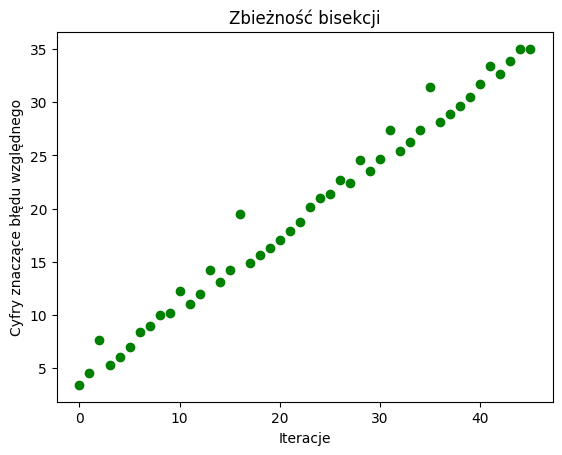

In [6]:
plot(rel_error_bisec_mars, marker="o", linestyle="", color="green")
xlabel("Iteracje")
ylabel("Cyfry znaczące błędu względnego")
title("Zbieżność bisekcji")
show()

wykres dla błędu względnego metody bisekcji



Badanie zbieżności funkcji iteracyjnej $x_{n+1} = e*sin(x_n) + M$:

In [7]:
E, rel_error_iter_mars = iteration_search(mars_M, mars_e, true)

iter: 1 	E: 0.9733504604418854	relative error: 0.0770066143488226
iter: 2 	E: 1.0505519016771363	relative error: 0.0037992522333053
iter: 3 	E: 1.0543731155820182	relative error: 0.0001757319261765
iter: 4 	E: 1.0545498920616423	relative error: 0.0000081011209703
iter: 5 	E: 1.0545580413971272	relative error: 0.0000003733979602
iter: 6 	E: 1.0545584170175277	relative error: 0.0000000172105855
iter: 7 	E: 1.0545584343305499	relative error: 0.0000000007932666
iter: 8 	E: 1.0545584351285380	relative error: 0.0000000000365630
iter: 9 	E: 1.0545584351653188	relative error: 0.0000000000016851
iter: 10 	E: 1.0545584351670141	relative error: 0.0000000000000775
iter: 11 	E: 1.0545584351670922	relative error: 0.0000000000000034
iter: 12 	E: 1.0545584351670958	relative error: 0.0000000000000000
iter: 13 	E: 1.0545584351670958	relative error: 0.0000000000000000


(1.0545584351670958, [2.563863960183642, 5.572951012322801, 8.646550870817626, 11.723508114469785, 14.800621068555248, 17.877741208726377, 20.954861807814893, 24.031984224119935, 27.109203773198477, 30.18869258539659, 33.324186801325745, Inf, Inf])

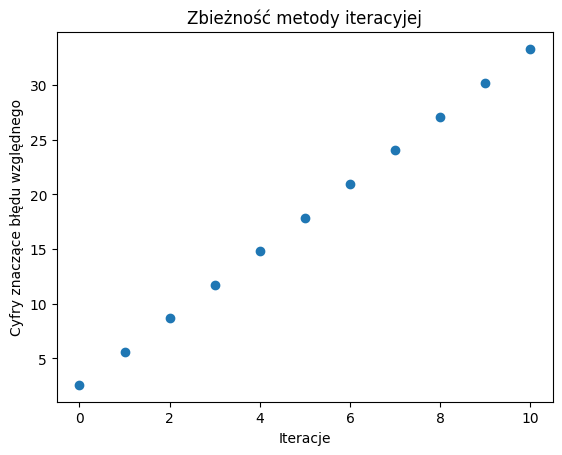

In [8]:
plot(rel_error_iter_mars, marker="o", linestyle="")
xlabel("Iteracje")
ylabel("Cyfry znaczące błędu względnego")
title("Zbieżność metody iteracyjej")
show()

Wykres błędu względnego dla funkcji iteracyjnej



Badanie zbieżności funckji metodą Newtona: \
Używam przybliżenia początkowego $x_0 = M + \frac{e}{2}$

In [9]:
E, rel_error_newton_mars = newton_search(mars_M, mars_e, true)

iter: 1 	E: 1.0546086255505700	relative error: 0.0000475937433152
iter: 2 	E: 1.0545584352743242	relative error: 0.0000000001016809
iter: 3 	E: 1.0545584351670960	relative error: 0.0000000000000002
iter: 4 	E: 1.0545584351670958	relative error: 0.0000000000000000


(1.0545584351670958, [9.952809248324652, 23.00918166061451, 36.096775523565526, Inf])

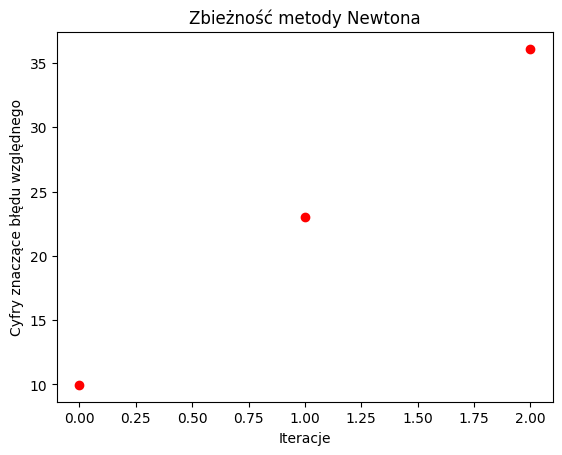

In [10]:
plot(rel_error_newton_mars, color="red", linestyle="", marker="o")
xlabel("Iteracje")
ylabel("Cyfry znaczące błędu względnego")
title("Zbieżność metody Newtona")
show()

Wykres błędu względnego metody newtona

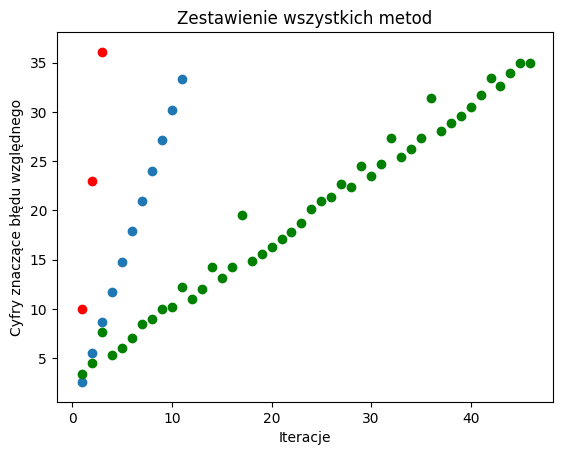

In [11]:
x1 = [e for e in 1:length(rel_error_bisec_mars)]
x2 = [e for e in 1:length(rel_error_iter_mars)]
x3 = [e for e in 1:length(rel_error_newton_mars)]
plot(x1,rel_error_bisec_mars, linestyle="", marker="o", color="green")
scatter(x2, rel_error_iter_mars)
scatter(x3, rel_error_newton_mars, color="red")
xlabel("Iteracje")
ylabel("Cyfry znaczące błędu względnego")
title("Zestawienie wszystkich metod")
show()

Zestawienie rosnącej dokładności poszczególnych metod

# Przykłady dla innych planet

In [12]:
#all data for 2019-01-01
#for earth
earth_e = 1.714784243883271E-02
earth_M = deg2rad(3.582577144695844E+02)

#for venus
venus_e = 1.440912442492587E-02
venus_M = deg2rad(3.364009332350369E+02)

#for mercury
mercury_e = 2.064529232369614E-01
mercury_M = deg2rad(1.388051146573238E+02)

2.422606269378541

In [13]:
E, rel_error_bisec_earth = bisec_search(earth_M, earth_e)
E, rel_error_iter_earth = iteration_search(earth_M, earth_e)
E, rel_error_newton_earth = newton_search(earth_M, earth_e)

E, rel_error_bisec_venus = bisec_search(venus_M, venus_e)
E, rel_error_iter_venus = iteration_search(venus_M, venus_e)
E, rel_error_newton_venus = newton_search(venus_M, venus_e, true)

E, rel_error_bisec_mercury = bisec_search(mercury_M, mercury_e)
E, rel_error_iter_mercury = iteration_search(mercury_M, mercury_e)
E, rel_error_newton_mercury = newton_search(mercury_M, mercury_e)

iter: 1 	E: 5.8654578471328893	relative error: 0.0000000843134150
iter: 2 	E: 5.8654583416697124	relative error: 0.0000000000000000
iter: 3 	E: 5.8654583416697124	relative error: 0.0000000000000000


(2.539529634232154, [12.495130034003916, 27.054796078755135, Inf, Inf])

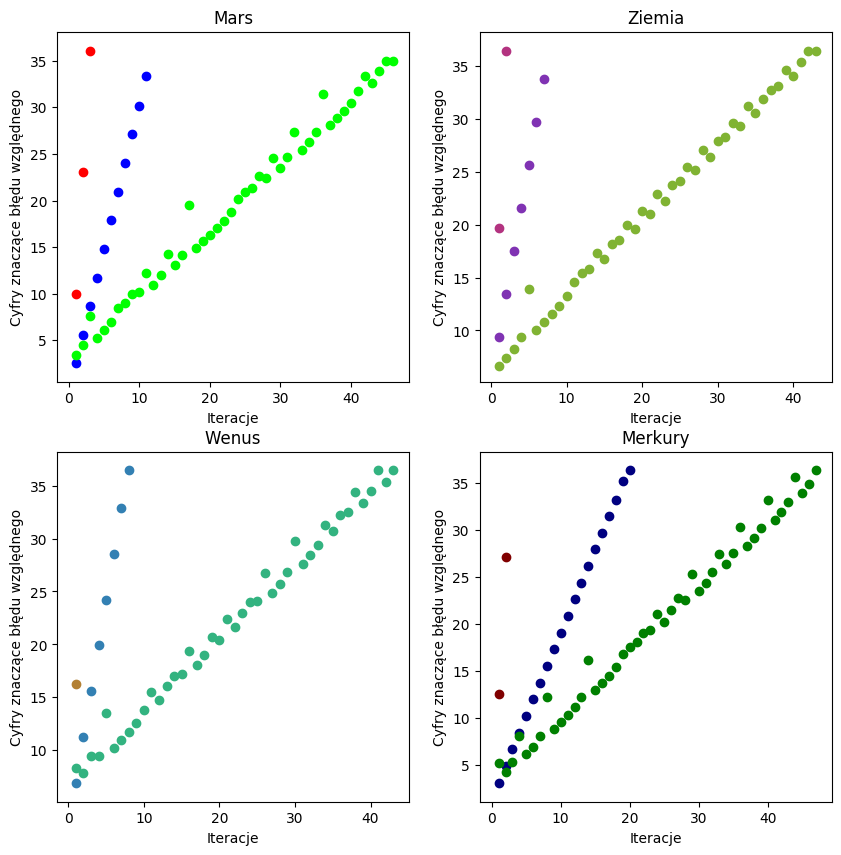

In [14]:
b1 = [e for e in 1:length(rel_error_bisec_earth)]
b2 = [e for e in 1:length(rel_error_bisec_venus)]
b3 = [e for e in 1:length(rel_error_bisec_mercury)]

i1 = [e for e in 1:length(rel_error_iter_earth)]
i2 = [e for e in 1:length(rel_error_iter_venus)]
i3 = [e for e in 1:length(rel_error_iter_mercury)]

n1 = [e for e in 1:length(rel_error_newton_earth)]
n2 = [e for e in 1:length(rel_error_newton_venus)]
n3 = [e for e in 1:length(rel_error_newton_mercury)]

figure1=figure("Position", [10, 10])

subplot(2,2,1)
plot(x1, rel_error_bisec_mars, linestyle="", marker="o", color=(0,1.0,0))
scatter(x2, rel_error_iter_mars, color=(0,0,1))
scatter(x3, rel_error_newton_mars, color=(1,0,0))
xlabel("Iteracje")
ylabel("Cyfry znaczące błędu względnego")
title("Mars")

subplot(2,2,2)
plot(b1, rel_error_bisec_earth, color=(0.5,0.7,0.2), linestyle="", marker="o")
scatter(i1, rel_error_iter_earth, color=(0.5,0.2,0.7))
scatter(n1, rel_error_newton_earth, color=(0.7,0.2,0.5))
xlabel("Iteracje")
ylabel("Cyfry znaczące błędu względnego")
title("Ziemia")

subplot(2,2,3)
plot(b2, rel_error_bisec_venus, color=(0.2,0.7,0.5), linestyle="", marker="o")
scatter(i2, rel_error_iter_venus, color=(0.2,0.5,0.7))
scatter(n2, rel_error_newton_venus, color=(0.7,0.5,0.2))
xlabel("Iteracje")
ylabel("Cyfry znaczące błędu względnego")
title("Wenus")

subplot(2,2,4)
plot(b3, rel_error_bisec_mercury, color=(0,0.5,0), linestyle="", marker = "o")
scatter(i3, rel_error_iter_mercury, color=(0,0,0.5))
scatter(n3, rel_error_newton_mercury, color=(0.5,0,0))
xlabel("Iteracje")
ylabel("Cyfry znaczące błędu względnego")
title("Merkury")

show()

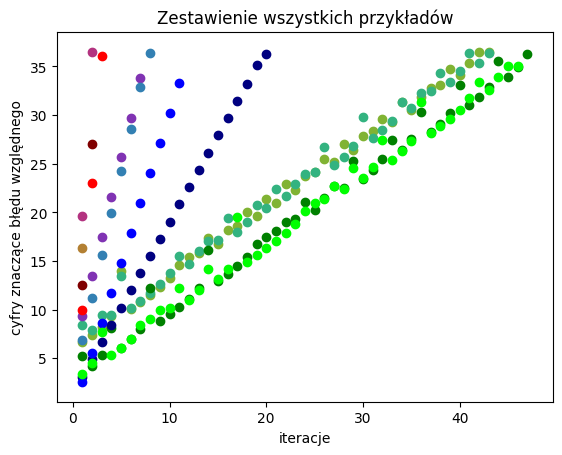

In [15]:
plot(x1, rel_error_bisec_mars, linestyle="", marker="o", color=(0,1.0,0))
scatter(b1, rel_error_bisec_earth, color=(0.5,0.7,0.2))
scatter(b2, rel_error_bisec_venus, color=(0.2,0.7,0.5))
scatter(b3, rel_error_bisec_mercury, color=(0,0.5,0))

scatter(i1, rel_error_iter_earth, color=(0.5,0.2,0.7))
scatter(i2, rel_error_iter_venus, color=(0.2,0.5,0.7))
scatter(i3, rel_error_iter_mercury, color=(0,0,0.5))
scatter(x2, rel_error_iter_mars, color=(0,0,1))

scatter(n1, rel_error_newton_earth, color=(0.7,0.2,0.5))
scatter(n2, rel_error_newton_venus, color=(0.7,0.5,0.2))
scatter(n3, rel_error_newton_mercury, color=(0.5,0,0))
scatter(x3, rel_error_newton_mars, color=(1,0,0))
xlabel("iteracje")
ylabel("cyfry znaczące błędu względnego")
title("Zestawienie wszystkich przykładów")
show()

# Przykład, że metoda iteracyjna nie zawsze jest zbieżna

Weźmy duże $e$ na przykład $e=10.0$

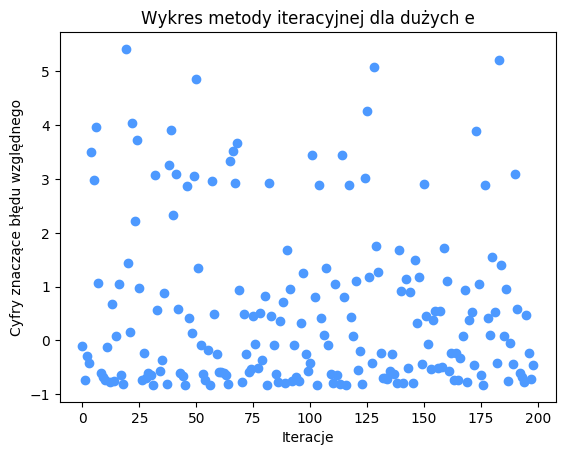

In [16]:
E, table = iteration_search(mars_M, 10.0)
plot(table, linestyle="", marker="o", color=(0.3,0.6,1))
xlabel("Iteracje")
ylabel("Cyfry znaczące błędu względnego")
title("Wykres metody iteracyjnej dla dużych e")
show()

Iteracja została zatrzymana dla $i=200$. Na wykresie widać, że kolejne iteracje nie zbiegają tak jak na poprzednich wykresach.

In [17]:
for i in 0.001:0.001:3
    E, table = iteration_search(mars_M, i)
    if length(table) == 200
        println(i)
        break
    end
end

1.302


W ten sposób można oszacować, że problemy pojawiają się dla $e \geq 1.302$